#ENTREGA DEL PROYECTO FINAL
###Primera pre-entrega <br>
Deberás entregar el avance de tu proyecto final. Crearás un notebook que deberá tener en primera instancia un abstract (250/500 palabras) de acuerdo al dataset elegido del desafío “Visualizaciones en Python”. Además se deben establecer las preguntas e hipótesis de interés sobre el dataset elegido. Finalmente, deberás generar visualizaciones (univariadas, bivariadas o multivariadas) junto con resúmenes numéricos acompañado de la interpretaciones respectivas que permitan responder la pregunta problema.

### OBJETIVOS:
*  Determinar las mejores calificaciones segÚn el tipo de comida.
*  Determinar si la calificacion está correlacionada con otras variables como el presupuesto, el genero, la edad, etc.
*  Determinar si la calificaciÓn general tiene relacion con la calificación del tipo de comida.


### CONTENIDO:

1. Analisis del dataset
2. Limpieza de datos
3. Desarrollo
4. Conclusiones

---

##1. Analisis del dataset
El dataset seleccionado se llama *Restaurant Cuisine Ratings* Contiene información detallada sobre usuarios de restaurantes, cubriendo aspectos demográficos, preferencias culinarias y sus valoraciones de comida y servicio. Este conjunto de datos es ideal para entender las preferencias de los clientes y las tendencias de consumo en el ámbito de la restauración.<br>Este dataset permite identificar patrones de consumo, entender cómo factores demográficos y preferencias personales afectan la satisfacción, y optimizar tanto las estrategias de marketing como la oferta de productos y servicios en los restaurantes. Es especialmente valioso para desarrollar sistemas de recomendación y mejorar la personalización en la experiencia gastronómica.



1.  Importamos las librerias con las que vamos a trabajar
2.  Cargamos el dataset
3.  Hacemos una primera revisión
4.  Detallamos sus columnas

###1.1.   Importamos las librerias con las que vamos a trabajar


In [ ]:
# Importamos las librerias con las que vamos a trabajar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1.2.   Cargamos el dataset


In [ ]:
# Cargamos el dataset
url = 'https://drive.google.com/uc?id=1JhNVULwT6AIElQYYBpnHjMoXtKAfB2Yw'
df = pd.read_csv(url)

### 1.3.   Hacemos una primera revisión

In [ ]:
# Hacemos una primera revisión
print("------------------------------------------------")
print(f"• Total de columnas: {df.shape[1]}")
print(f"• Total de registros: {df.shape[0]}")
print("------------------------------------------------")
df.head()

------------------------------------------------
• Total de columnas: 15
• Total de registros: 200
------------------------------------------------


,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


### 1.4.  Detallamos sus columnas:
- **User ID**: Identificación de usuario de los clientes.  
- **Area Code**: Código de área de la residencia de los clientes.  
- **Location**: Zona y ciudad de residencia de los clientes.  
- **Gender**: Género del cliente.  
- **YOB**: Año de nacimiento del cliente.  
- **Marital status**: Estado civil del cliente.  
- **Activity**: Situación laboral del cliente, ya sea estudiante o profesional.  
- **Budget**: Presupuesto que pueden gastar en el restaurante.  
- **Cuisines**: Cocina que prefieren o les gusta más consumir en el restaurante.  
- **Alcohol**: Frecuencia de consumo de alcohol.  
- **Smoker**: Frecuencia de consumo de tabaco.  
- **Food Rating**: Calificación que dieron a la comida del restaurante.  
- **Service Rating**: Calificación que dieron al servicio del restaurante.  
- **Overall Rating**: Calificación promedio calculada a partir de las calificaciones de la comida y el servicio.  
- **Often A S**: Frecuencia con la que visitaron el restaurante.

---

##2. Limpieza de los datos
Evaluarmos:

1.  Datos faltantes
2.  Regitros (filas) repetidos
3.  Columnas irrelevantes (que no responden al problema que queremos resolver)

###2.1. Datos faltantes

In [ ]:
# Datos faltantes?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User ID         200 non-null    int64  
 1   Area code       200 non-null    int64  
 2   Location        200 non-null    object 
 3   Gender          200 non-null    object 
 4   YOB             200 non-null    int64  
 5   Marital Status  200 non-null    object 
 6   Activity        200 non-null    object 
 7   Budget          200 non-null    int64  
 8   Cuisines        200 non-null    object 
 9   Alcohol         200 non-null    object 
 10  Smoker          200 non-null    object 
 11  Food Rating     200 non-null    int64  
 12  Service Rating  200 non-null    int64  
 13  Overall Rating  200 non-null    float64
 14  Often A S       200 non-null    object 
dtypes: float64(1), int64(6), object(8)
memory usage: 23.6+ KB


**NOTA:** El dataset presenta 1 columna con valores con decimales, 6 columnas con valores enteros y 8 columnas con datos de tipo texto. **Tampoco se observan datos faltantes: 200 non-null en las 15 columnas**

###2.2. Registros (filas) repetidos


In [ ]:
# Registros (filas) repetidos
print(f'Tamaño del set antes de eliminar las filas repetidas: {df.shape}')
df.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {df.shape}')

Tamaño del set antes de eliminar las filas repetidas: (200, 15)
Tamaño del set después de eliminar las filas repetidas: (200, 15)


**NOTA:** No se registraron registros duplicados en el dataset

###2.3. Columnas irrelevantes (que no responden al problema que queremos resolver)

In [ ]:
# Columnas irrelevantes
df.columns

Index(['User ID', 'Area code', 'Location', 'Gender', 'YOB', 'Marital Status',
       'Activity', 'Budget', 'Cuisines', 'Alcohol ', 'Smoker', 'Food Rating',
       'Service Rating', 'Overall Rating', 'Often A S'],
      dtype='object')

In [ ]:
# Evaluamos convertir la columna User ID en índice del df
print(f"• El dataset tiene 200 registros distintos y {df['User ID'].nunique()} User IDs únicos.")


• El dataset tiene 200 registros distintos y 200 User IDs únicos.


In [ ]:
df.set_index("User ID", inplace=True)

**NOTA:** Dada la unicidad de los *User ID*s la convertimos en columnas index y surpimimos la que genera python por defecto.

In [ ]:
# Crearemos una columna donde calcularemos la edad en años actual.
# Importamos librería
from datetime import datetime

# Definir y calcular el año actual
current_year = datetime.now().year

# Crear una nueva columna 'Age' calculando la edad
df['Age'] = current_year - df['YOB']

# Suprimo columnas que son irrelevantes
df = df.drop(['Area code','Location', 'YOB', 'Alcohol ', 'Smoker', 'Often A S'], axis=1)

**NOTA:** Creamos la columa Age para determinar la edad actual del User ID y suprimimos la columnas irrelevantes.

In [64]:
# Crear la nueva columna 'Age Group' con los rangos de edad
df['Age Group'] = pd.cut(df['Age'], bins=[0, 20, 40, float('inf')], labels=['Niño a 20', '20 a 40', '+ de 40'], right=False)

Revisamos el dataset

In [65]:
# Hacemos una segunda revisión
print("------------------------------------------------")
print(f"• Total de columnas: {df.shape[1]}")
print(f"• Total de registros: {df.shape[0]}")
print("------------------------------------------------")
df

------------------------------------------------
• Total de columnas: 10
• Total de registros: 200
------------------------------------------------


,Gender,Marital Status,Activity,Budget,Cuisines,Food Rating,Service Rating,Overall Rating,Age,Age Group
User ID,,,,,,,,,,
1,Female,Single,Professional,3,Japanese,5,4,4.5,18,Niño a 20
2,Female,Married,Student,3,Indian,1,1,1.0,33,20 a 40
3,Male,Single,Student,5,Seafood,5,5,5.0,47,+ de 40
4,Female,Married,Professional,5,Japanese,3,1,2.0,68,+ de 40
5,Male,Single,Student,4,Filipino,2,4,3.0,27,20 a 40
...,...,...,...,...,...,...,...,...,...,...
196,Female,Single,Professional,4,French,1,2,1.5,42,+ de 40
197,Female,Married,Student,4,Chinese,1,2,1.5,24,20 a 40
198,Female,Single,Professional,5,Japanese,5,2,3.5,18,Niño a 20


Revisamos las variables numéricas

In [67]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Budget,200.0,3.82,1.06,1.0,3.0,4.0,5.0,5.0
Food Rating,200.0,3.22,1.41,1.0,2.0,3.0,5.0,5.0
Service Rating,200.0,3.23,1.53,1.0,2.0,3.0,5.0,5.0
Overall Rating,200.0,3.22,1.08,1.0,2.5,3.0,4.0,5.0
Age,200.0,39.17,16.81,15.0,24.0,37.0,53.0,69.0


----

##3. Desarrollo<br>


1.  Análisis por género
2.  Análisis por tipo de cocina
3.  Análisis por grupo de edad grupo de edad y tipos de cocinas mejores calificados



###3.1. Análisis por género

In [ ]:
# Determinar la cantidad de reseñas por género
cantidad_por_genero = df.groupby('Gender').size().reset_index(name='count')

# Calcular el porcentaje del total
total_resenas = cantidad_por_genero['count'].sum()
cantidad_por_genero['percentage'] = (cantidad_por_genero['count'] / total_resenas * 100).round(1)

cantidad_por_genero

,Gender,count,percentage
0,Female,82,41.0
1,Male,118,59.0


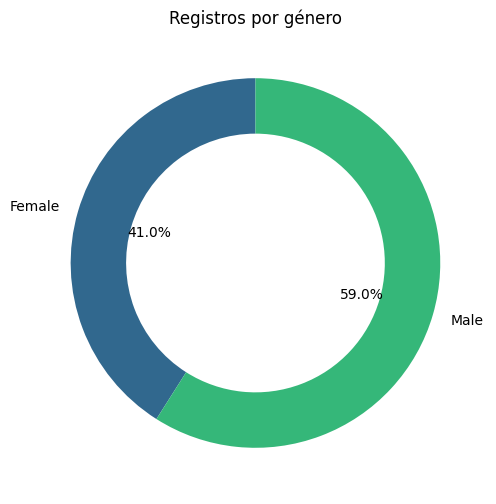

In [ ]:
# Agrupar por 'Gender' y contar la cantidad de registros en cada grupo
cantidad_por_genero = df.groupby('Gender').size().reset_index(name='count')

# Crear gráfico de dona
plt.figure(figsize=(8, 6))

plt.pie(cantidad_por_genero['count'], labels=cantidad_por_genero['Gender'],
autopct='%1.1f%%', startangle=90, wedgeprops={'width':0.3}, colors=sns.
color_palette("viridis", len(cantidad_por_genero)))

plt.title('Registros por género')

plt.show()

**NOTA:** de las 200 reseñas, el 60% son de hombres y el 40% de mujeres


In [ ]:
# Calculo el Service Rating por genero
df_agrupado = df.groupby('Gender')['Service Rating'].mean().round(2)
df_agrupado


,Service Rating
Gender,
Female,3.34
Male,3.15


<ipython-input-40-02c10271bffc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_agrupado, x='Gender', y='Food Rating', palette='viridis')


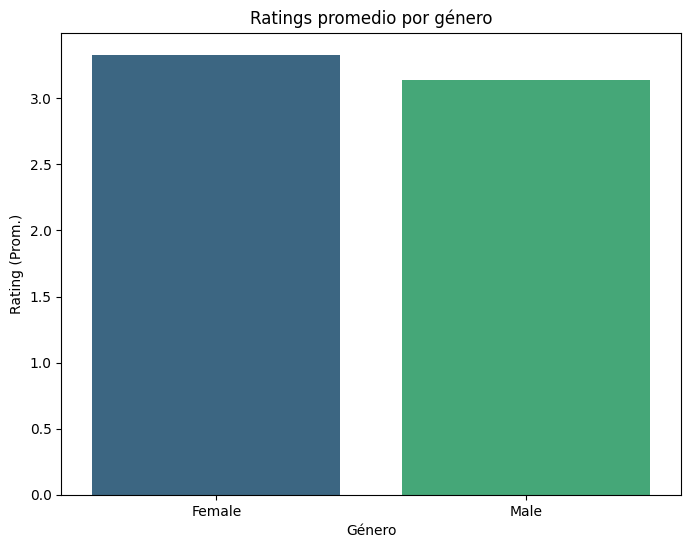

In [ ]:
# Calculo el Food Rating promedio por género y convertirlo a DataFrame
df_agrupado = df.groupby('Gender')['Food Rating'].mean().round(2).reset_index()

# Creo un gráfico de barras con Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=df_agrupado, x='Gender', y='Food Rating', palette='viridis')

plt.title('Ratings promedio por género')
plt.xlabel('Género')
plt.ylabel('Rating (Prom.)')
plt.show()

**NOTA:** Si bien es mayor la cantidad de reseñas por parte de hombres, el promedio entre los hombres y las mujeres no presentan mayores diferencias. Las calificaciones pueden ser de 0 a 5 y en promedio para los 2 géneros oscilan los 3 puntos.

---

###3.2. Análisis por Tipo de cocina

In [ ]:
# Agrupar por 'Cuisines' y calcular el promedio de 'Food Rating'
promedio_food_rating = df.groupby([ 'Cuisines'])['Food Rating'].mean().reset_index(name='Average Food Rating')

# Ordenar de mayor a menor según 'Average Food Rating'
promedio_food_rating = promedio_food_rating.sort_values(by='Average Food Rating', ascending=False)

# Mostrar el resultado
promedio_food_rating

,Cuisines,Average Food Rating
5,Japanese,3.861111
0,Chinese,3.458333
2,French,3.294118
6,Seafood,3.227273
4,Italian,3.222222
3,Indian,2.781250
1,Filipino,2.705882


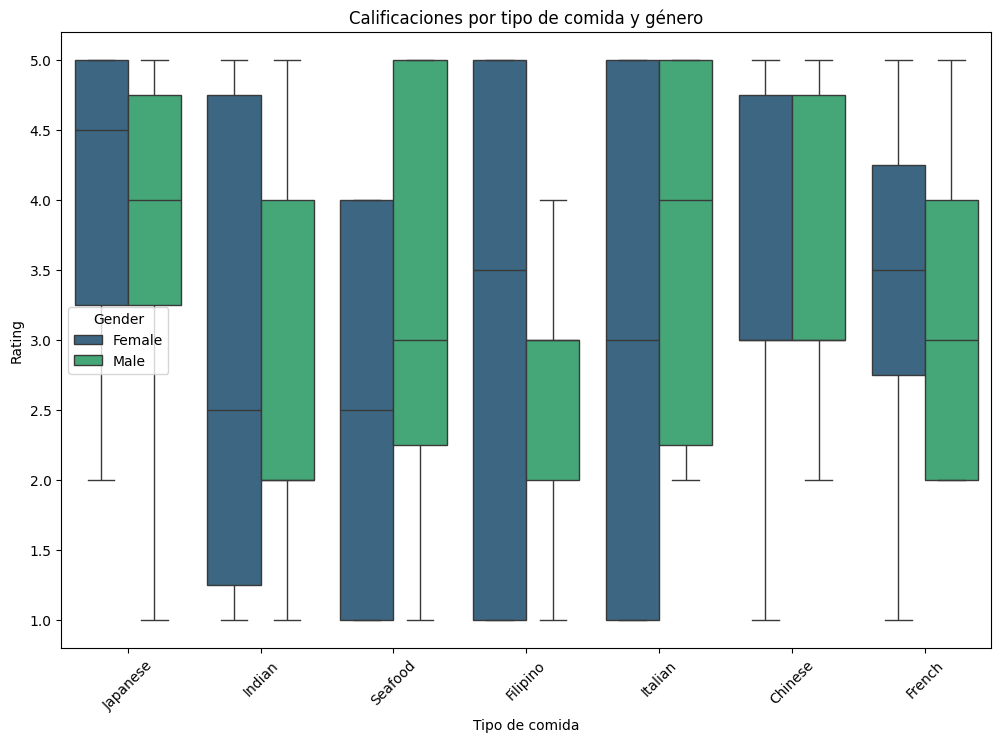

In [ ]:
# Creo un gráfico de cajas (boxplot) para 'Food Rating' agrupado por 'Cuisines' y 'Gender'
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Cuisines', y='Food Rating', hue='Gender', palette='viridis')

# Añadir título y etiquetas
plt.title('Calificaciones por tipo de comida y género')
plt.xlabel('Tipo de comida')
plt.ylabel('Rating')

plt.xticks(rotation=45)  # Rotar etiquetas de las comidas si es necesario

plt.show()

**NOTA:** Desagregando los promedio por Tipos de comida se observa que **los tipos de comidas SIEMPRE mejores calificadas son las de tipo Japanese y Chinese INDEPENDIENTEMENTE EL GENERO**

###3.3.  Análisis por grupo de edad grupo de edad y tipos de cocinas mejores calificados

#### Analizaremos los tipos de comida por Japanese y Chinese; las mejores calificadas.

In [ ]:
# Filtrar los datos para seleccionar solo las cocinas 'Japanese' y 'Chinese'
df_filtrado = df[df['Cuisines'].isin(['Japanese', 'Chinese'])]

# Calcular el promedio de 'Food Rating' por 'Age Group' y 'Cuisines'
promedio_food_rating = df_filtrado.groupby(['Age Group', 'Cuisines'])['Food Rating'].mean().reset_index(name='Average Food Rating').round(1)

# Mostrar el resultado
print(promedio_food_rating)


   Age Group  Cuisines  Average Food Rating
0  Niño a 20   Chinese                  4.0
1  Niño a 20  Japanese                  4.8
2    20 a 40   Chinese                  2.8
3    20 a 40  Japanese                  3.4
4    + de 40   Chinese                  3.6
5    + de 40  Japanese                  3.9


<ipython-input-44-9952e17271b4>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  promedio_food_rating = df_filtrado.groupby(['Age Group', 'Cuisines'])['Food Rating'].mean().reset_index(name='Average Food Rating').round(1)


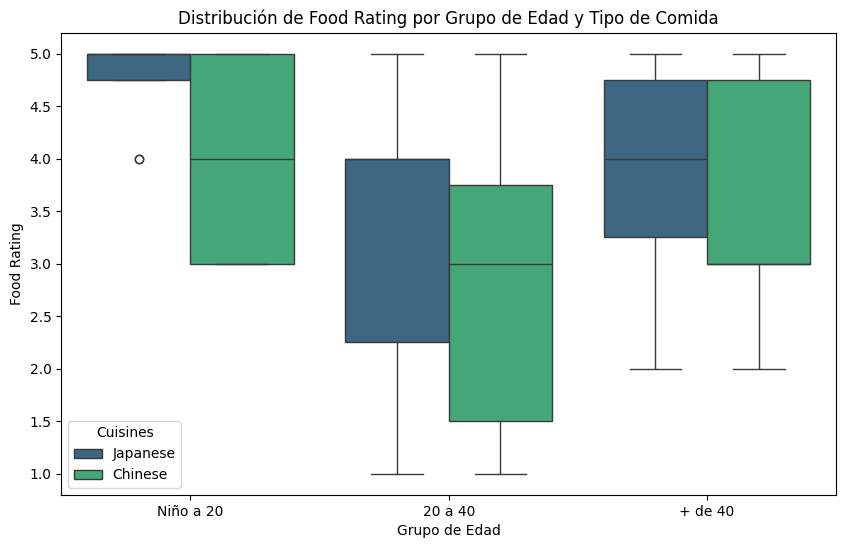

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar los datos para seleccionar solo las cocinas 'Japanese' y 'Chinese'
df_filtrado = df[df['Cuisines'].isin(['Japanese', 'Chinese'])]

# Crear el gráfico de cajas con Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtrado, x='Age Group', y='Food Rating', hue='Cuisines', palette='viridis')

# Añadir título y etiquetas
plt.title('Distribución de Food Rating por Grupo de Edad y Tipo de Comida')
plt.xlabel('Grupo de Edad')
plt.ylabel('Food Rating')

# Mostrar el gráfico
plt.show()


**NOTA:** Estos tipos de comida tiene mayor aceptacion en niños y adolescentes (hasta 20 años) y personas mayores de 40 años.

---

## 4. Conclusiones

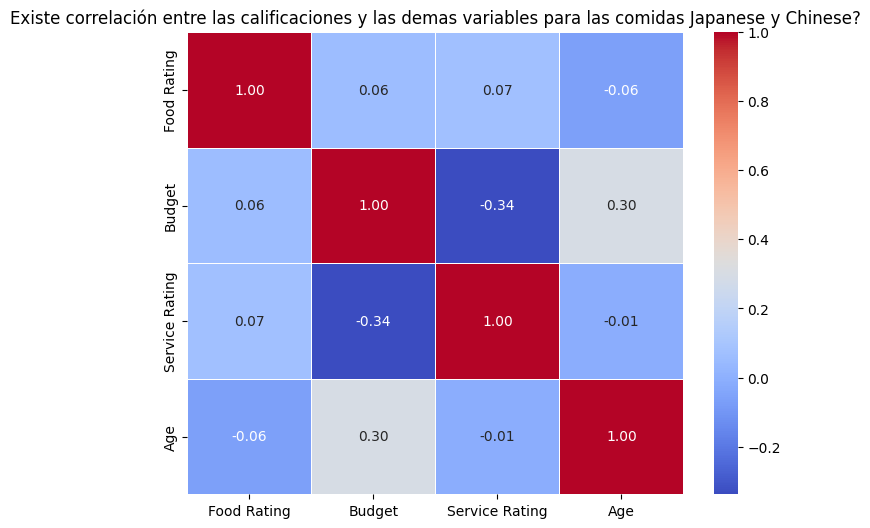

In [ ]:
# Filtrar los datos para seleccionar solo las cocinas 'Japanese' y 'Chinese'
df_filtrado = df[df['Cuisines'].isin(['Japanese', 'Chinese'])]

# Calcular la correlación entre 'Food Rating', 'Budget', 'Service Rating' y 'Age' solo para las cocinas seleccionadas
correlaciones = df_filtrado[['Food Rating', 'Budget', 'Service Rating', 'Age']].corr()

# Crear el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Añadir título
plt.title('Existe correlación entre las calificaciones y las demas variables para las comidas Japanese y Chinese?')

# Mostrar el gráfico
plt.show()


Correlación entre Overall Rating y Food Rating: 0.65


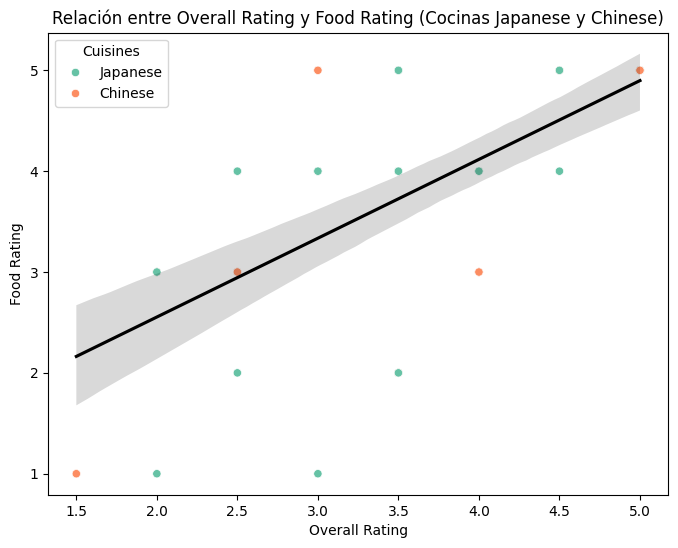

In [ ]:
# Filtrar los datos para seleccionar solo las cocinas 'Japanese' y 'Chinese'
df_filtrado = df[df['Cuisines'].isin(['Japanese', 'Chinese'])]

# Calcular la correlación entre 'Overall Rating' y 'Food Rating'
correlacion = df_filtrado[['Overall Rating', 'Food Rating']].corr().iloc[0, 1]

# Mostrar la correlación
print(f'Correlación entre Overall Rating y Food Rating: {correlacion:.2f}')

# Crear un gráfico de dispersión (scatter plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_filtrado, x='Overall Rating', y='Food Rating', hue='Cuisines', palette='Set2')

# Añadir una línea de regresión para ver la relación
sns.regplot(data=df_filtrado, x='Overall Rating', y='Food Rating', scatter=False, color='black')

# Añadir título y etiquetas
plt.title('Relación entre Overall Rating y Food Rating (Cocinas Japanese y Chinese)')
plt.xlabel('Overall Rating')
plt.ylabel('Food Rating')

# Mostrar el gráfico
plt.show()



*  Los tipos de cocina mejores calificados son *Japanese* y *Chinese*
* Las buenas calificaciones no estan relacionadas con demas variables como la edad, el presupuesto o los servicios extras
* La calificacion general (overall rating) tiene una correlacion directa y positiva con las calificación de la comida (food rating).



---